
# Project: Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This project will be analizing data associated to Movies dataset i want to know the below:

1- Is Movie Budget affects on Movie Revenue ??
i want to know if we spend alot of mony on movie production will earn a lot of mony or there are no relations between them

2- Is popularity and Revenue affected by spent Budget on Movie??
i want to know the factors that afects on popularity,if we spend alot of mony in production the popularity of movie will 
increase or nor?
and if the popularity increased will affect on revenue and revenue will increase also or not.


In [258]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> 
will load the data to see fields data types , null values and unnecessary columns ,first:i will delete unnecessary fields,second:will correct wrong data types,third: will replace null values,
every step below explaind in comment below

### General Properties

In [260]:
#reading the file to see the data
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# find number of rows and columns
df.shape

(10866, 21)

In [6]:
# check data types , null values and unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning (delete unnecessary column,fix data types,replace nulls values)

In [15]:
# Drop unnessesary columns
df.drop(['imdb_id','cast','homepage','director','tagline','keywords','overview','runtime','production_companies'],axis=1 , inplace=True)


In [13]:
# check that the unnecessary column is dropped
df.head(5)

,id,popularity,budget,revenue,original_title,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
# check on selected columns data types,i found release_date is object not date 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


In [17]:
# modify release_date data tyoe from object to date 
df['release_date'] = df['release_date'].astype('datetime64[ns]')

In [18]:
# check that data type is changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
genres            10843 non-null object
release_date      10866 non-null datetime64[ns]
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 1018.8+ KB


In [22]:
# check on null values to replace it with value
df[df.genres.isnull()]

,id,popularity,budget,revenue,original_title,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,0,0,Belli di papÃ,NaN,2015-10-29,21,6.1,2015,0.00000,0.0
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,2015-10-06,13,5.0,2015,0.00000,0.0
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,NaN,2014-10-03,13,6.8,2014,0.00000,0.0
1712,21634,0.302095,0,0,Prayers for Bobby,NaN,2009-02-27,57,7.4,2009,0.00000,0.0
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,NaN,2009-02-27,11,7.0,2009,0.00000,0.0
2370,127717,0.081892,0,0,Freshman Father,NaN,2010-06-05,12,5.8,2010,0.00000,0.0
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,NaN,2010-12-25,11,7.7,2010,0.00000,0.0
2853,57892,0.130018,0,0,Vizontele,NaN,2001-02-02,12,7.2,2001,0.00000,0.0
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,NaN,2008-08-13,11,6.1,2008,0.00000,0.0
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,NaN,2012-07-27,12,8.3,2012,0.00000,0.0


In [23]:
# replace null values with default value
df.genres.fillna('Action',inplace = True)

In [24]:
# check that there is no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
genres            10866 non-null object
release_date      10866 non-null datetime64[ns]
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 1018.8+ KB


In [25]:
df.tail(20)

,id,popularity,budget,revenue,original_title,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10846,17102,0.212716,0,0,Dracula: Prince of Darkness,Horror,2066-01-09,16,5.7,1966,0.000000e+00,0.000000e+00
10847,28763,0.034555,0,0,Island of Terror,Science Fiction|Horror,2066-06-20,13,5.3,1966,0.000000e+00,0.000000e+00
10848,2161,0.207257,5115000,12000000,Fantastic Voyage,Adventure|Science Fiction,2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07
10849,28270,0.206537,0,0,Gambit,Action|Comedy|Crime,2066-12-16,14,6.1,1966,0.000000e+00,0.000000e+00
10850,26268,0.202473,0,0,Harper,Action|Drama|Thriller|Crime|Mystery,2066-02-23,14,6.0,1966,0.000000e+00,0.000000e+00
10851,15347,0.342791,0,0,Born Free,Adventure|Drama|Action|Family|Foreign,2066-06-22,15,6.6,1966,0.000000e+00,0.000000e+00
10852,37301,0.227220,0,0,A Big Hand for the Little Lady,Western,2066-05-31,11,6.0,1966,0.000000e+00,0.000000e+00
10853,15598,0.163592,0,0,Alfie,Comedy|Drama|Romance,2066-03-29,26,6.2,1966,0.000000e+00,0.000000e+00
10854,31602,0.146402,0,0,The Chase,Thriller|Drama|Crime,2066-02-17,17,6.0,1966,0.000000e+00,0.000000e+00
10855,13343,0.141026,700000,0,The Ghost & Mr. Chicken,Comedy|Family|Mystery|Romance,2066-01-20,14,6.1,1966,4.702610e+06,0.000000e+00


In [32]:
#  save final file to csv
df.to_csv('Movie_Edited.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Is Movie Budget affects on Movie Revenue ??)
We want to know if movie budget increase will revenue increase also??
as the below chart shows the number of movies increase over the years(for example for every 5 years(1995 to 2015),
the revenue is increase also but there is independency between the budget and revenue , for example the revenue in 2015 is more than 2010 althought the budget of 2015 is less than 2010

In [115]:
# get data for specific 5 years
Movie_1995 = df.query('release_year == 1995')
Movie_2000 = df.query('release_year == 2000')
Movie_2005 = df.query('release_year == 2005')
Movie_2010 = df.query('release_year == 2010')
Movie_2015 = df.query('release_year == 2015')

In [173]:
# get no of movies,revenue and budget in each year
x=Movie_1995.count().id
y=Movie_2000.count().id
z=Movie_2005.count().id
s=Movie_2010.count().id
u=Movie_2015.count().id

x1=Movie_1995.sum().revenue/1000000
y1=Movie_2000.sum().revenue/1000000
z1=Movie_2005.sum().revenue/1000000
s1=Movie_2010.sum().revenue/1000000
u1=Movie_2015.sum().revenue/1000000

x2=Movie_1995.sum().budget/1000000
y2=Movie_2000.sum().budget/1000000
z2=Movie_2005.sum().budget/1000000
s2=Movie_2010.sum().budget/1000000
u2=Movie_2015.sum().budget/1000000



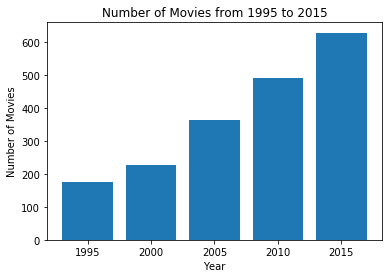

In [119]:
# show no of movies for each year
plt.bar(['1995','2000','2005','2010','2015'], [x,y,z,s,u])
plt.title("Number of Movies from 1995 to 2015")
plt.xlabel("Year")
plt.ylabel("Number of Movies");

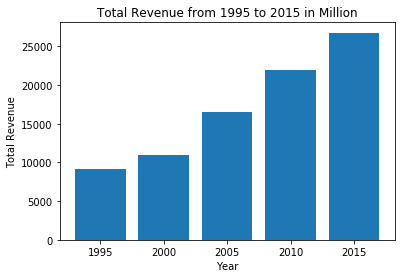

In [130]:
# is increase in movie budget will increase the movie revenue??
# Answer: According to the below histograms the revenue not depenf on the spent budget as in 2015 the budget spent is larger than 2010 but the revenue is less than 2010
plt.bar(['1995','2000','2005','2010','2015'], [x1,y1,z1,s1,u1])
plt.title("Total Revenue from 1995 to 2015 in Million")
plt.xlabel("Year")
plt.ylabel("Total Revenue");

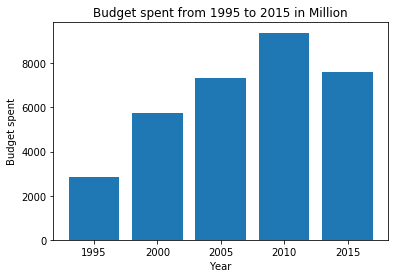

In [133]:
# show total budget in each year
plt.bar(['1995','2000','2005','2010','2015'], [x2,y2,z2,s2,u2])
plt.title("Budget spent from 1995 to 2015 in Million")
plt.xlabel("Year")
plt.ylabel("Budget spent");

In [169]:
release_year1=df.release_year

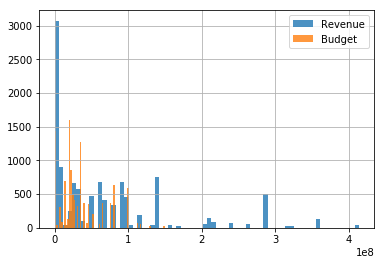

In [170]:
# the relation between budget and revenue in one chart
df.revenue[release_year1].hist(alpha=0.8,bins=70,label='Revenue')
df.budget[release_year1].hist(alpha=0.8,bins=70,label='Budget')
plt.legend()

### Research Question 2  (Is popularity and Revenue affected by spent Budget on Movie??)
I want to know if we spend mony in production this will affect on popularity and then on revenue??
regarding to the below analytics we see that there isn't any dependance between popularity and spent budget as in 2015 the budget spent is less than 2010 althought the movies popularity is more than 2010,so there is many facrors affects on popularity such as type of movie(generes) or the film story or the actors in sometimes,but the revenue is depend on popularity the both increase and decrease together.

I choose the action movies to know its popularity from 2005 to 2015 and see their budget spent and revenue on them, i noticed that the popularity and revenue increases by years while the budget spent  is decrease, so there is no relations between popularity and spent budget,but there is a relation between popularity and revenue.

In [236]:
# filter on specific years
Movie_1995 = df.query('release_year == 1995')
Movie_2000 = df.query('release_year == 2000')
Movie_2005 = df.query('release_year == 2005')
Movie_2010 = df.query('release_year == 2010')
Movie_2015 = df.query('release_year == 2015')

In [238]:
# get mean of popularity in each year
x3=Movie_1995.mean().popularity
y3=Movie_2000.mean().popularity
z3=Movie_2005.mean().popularity
s3=Movie_2010.mean().popularity
u3=Movie_2015.mean().popularity

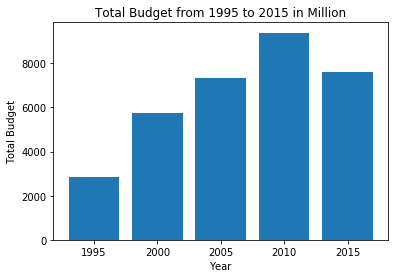

In [239]:
# get total pudget in each year
plt.bar(['1995','2000','2005','2010','2015'], [x2,y2,z2,s2,u2])
plt.title("Total Budget from 1995 to 2015 in Million")
plt.xlabel("Year")
plt.ylabel("Total Budget");

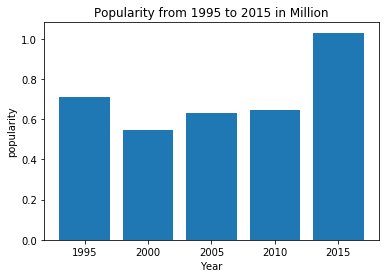

In [240]:
# get mean of popularity in each year
plt.bar(['1995','2000','2005','2010','2015'], [x3,y3,z3,s3,u3])
plt.title("Popularity from 1995 to 2015 in Million")
plt.xlabel("Year")
plt.ylabel("popularity");

In [199]:
# get movie that have max popularity in 1995
Movie_1995[Movie_1995['popularity'] == Movie_1995['popularity'].max()]

,id,popularity,budget,revenue,original_title,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8067,807,4.765359,33000000,327311859,Se7en,Crime|Mystery|Thriller,1995-09-22,3535,7.9,1995,4.722191e+07,4.683724e+08


In [268]:
 # get poularity for action moviea in each year
 Pop_1995=Movie_1995.query('genres in ["Action"]').popularity.mean()
 Pop_2000=Movie_2000.query('genres in ["Action"]').popularity.mean()
 Pop_2005=Movie_2005.query('genres in ["Action"]').popularity.mean()
 Pop_2010=Movie_2010.query('genres in ["Action"]').popularity.mean()
 Pop_2015=Movie_2015.query('genres in ["Action"]').popularity.mean() 

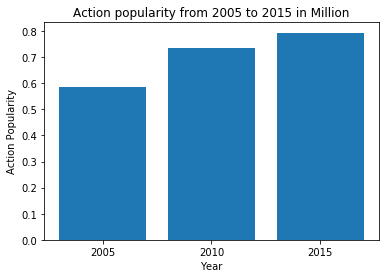

In [269]:
# plot poularity for action moviea in each year
plt.bar(['2005','2010','2015'], [Pop_2005,Pop_2010,Pop_2015])
plt.title("Action popularity from 2005 to 2015 in Million")
plt.xlabel("Year")
plt.ylabel("Action Popularity");

In [266]:
 # get sum budget for Actiom movies for each year
 Budget_2005=Movie_2005.query('genres in ["Action"]').budget.sum()
 Budget_2010=Movie_2010.query('genres in ["Action"]').budget.sum()
 Budget_2015=Movie_2015.query('genres in ["Action"]').budget.sum() 

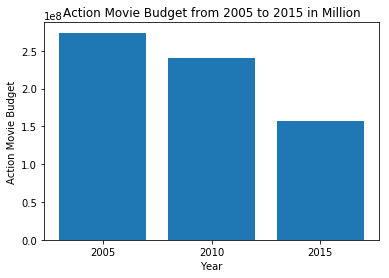

In [267]:
plt.bar(['2005','2010','2015'], [Budget_2005,Budget_2010,Budget_2015])
plt.title("Action Movie Budget from 2005 to 2015 in Million")
plt.xlabel("Year")
plt.ylabel("Action Movie Budget");

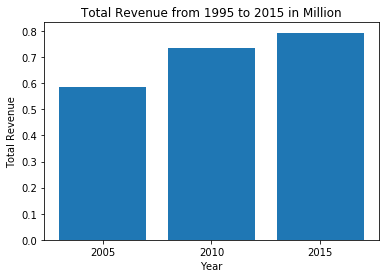

In [257]:
# get total revenue for action movies for each year
plt.bar(['2005','2010','2015'], [Pop_2005,Pop_2010,Pop_2015])
plt.title("Total Revenue from 1995 to 2015 in Million")
plt.xlabel("Year")
plt.ylabel("Total Revenue");

<a id='conclusions'></a>
## Conclusions

> 

Finally,After the results that have been performed above, i found the below:

1- The revenue not affected by the spent budget on movies.


the above chart shows the number of movies increase over the years(for example for every 5 years(1995 to 2015), the revenue is increase also but there is independency between the budget and revenue , for example the revenue in 2015 is more than 2010 althought the budget of 2015 is less than 2010

2- the revenue affected by popularity they depend on each other,increase together or decrease together.

3- the popularity not affected by spent budget on movie, it may be affect by genres,Actors,or the film story.

4- the revenue affected by number of movies.

regarding to the above analytics we see that there isn't any dependance between popularity and spent budget as in 2015 the budget spent is less than 2010 althought the movies popularity is more than 2010,so there is many facrors affects on popularity such as type of movie(generes) or the film story or the actors in sometimes,but the revenue is depend on popularity the both increase and decrease together.
